# Apply simple CV algorithms to geo pictures

1. create threshold map of max brightenss
- erode
- split objects
- dilate
- make submission

In [4]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 0. Imread

In [ ]:
'dataset/TESTING_0/2YNGEOYOEH0YXBJV/2YNGEOYOEH0YXBJV.png'

In [2]:
! ls dataset/TESTING\ O/

2YNGEOYOEH0YXBJV


In [5]:
test_pic = cv2.imread('dataset/TESTING_0/2YNGEOYOEH0YXBJV/2YNGEOYOEH0YXBJV.png')

In [6]:
test_pic.shape

(7737, 6529, 3)

## 1. Create threshold map

In [17]:
ret1,th1 = cv2.threshold(test_pic,250,255,cv2.THRESH_BINARY)
# test_pic

In [11]:
th1.shape

(7737, 6529, 3)

Text(0.5,1,'mask')

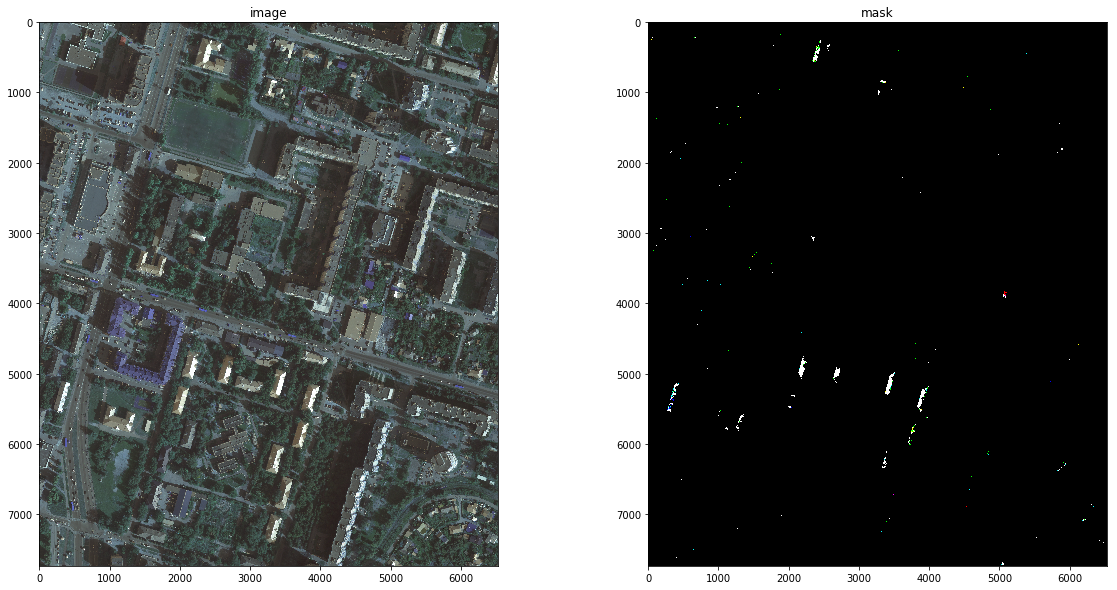

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(test_pic, cmap='gray')
ax1.set_title('image')
ax2.imshow(th1, cmap='gray_r')
ax2.set_title('mask')

In [21]:
mask = cv2.cvtColor(th1, cv2.COLOR_BGR2GRAY)

Text(0.5,1,'mask')

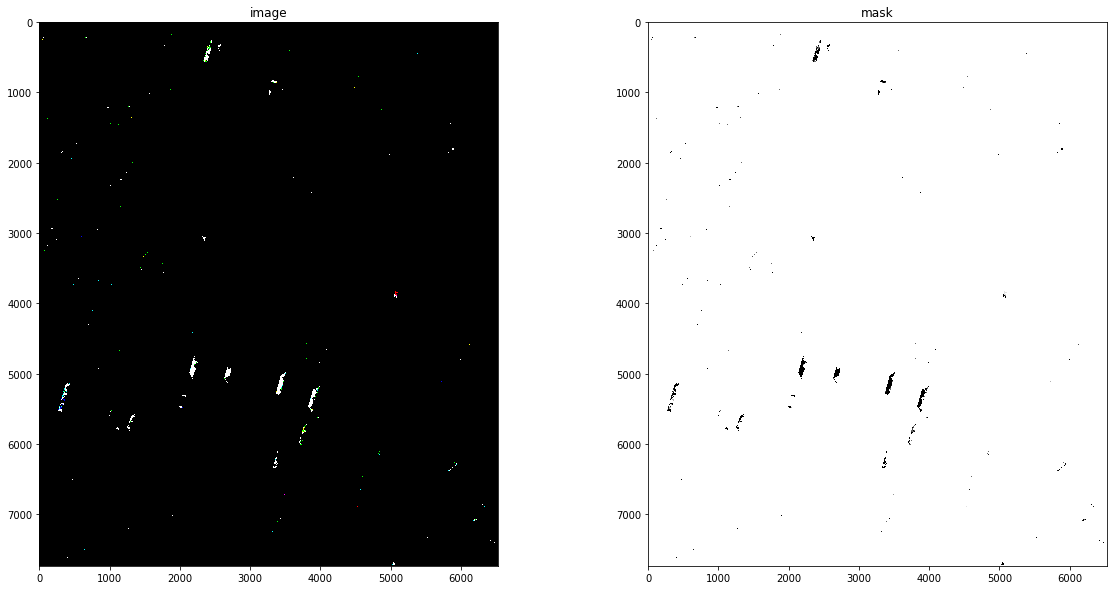

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(th1, cmap='gray')
ax1.set_title('image')
ax2.imshow(mask, cmap='gray_r')
ax2.set_title('mask')

In [29]:
np.unique(mask)

array([  0,  29,  76, 105, 150, 179, 226, 255], dtype=uint8)

In [34]:
vfunc = np.vectorize(lambda x: 0 if x < 255 else 1)

<function matplotlib.pyplot.show(*args, **kw)>

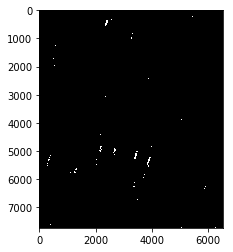

In [35]:
plt.imshow(vfunc(mask), cmap='gray')
plt.show

In [36]:
mask = vfunc(mask)

## 2. Erode

In [63]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(mask.astype(np.float32),kernel,iterations = 1)

In [79]:
opening = cv2.morphologyEx(mask.astype(np.float32), cv2.MORPH_OPEN, kernel, iterations = 1)

In [78]:
dilation = cv2.dilate(mask.astype(np.float32),kernel,iterations = 1)

In [85]:
dilation = cv2.dilate(mask.astype(np.float32),kernel,iterations = 1)
toy_pic = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel, iterations = 5)
dilation = cv2.dilate(mask.astype(np.float32),kernel,iterations = 10)

Text(0.5,1,'mask')

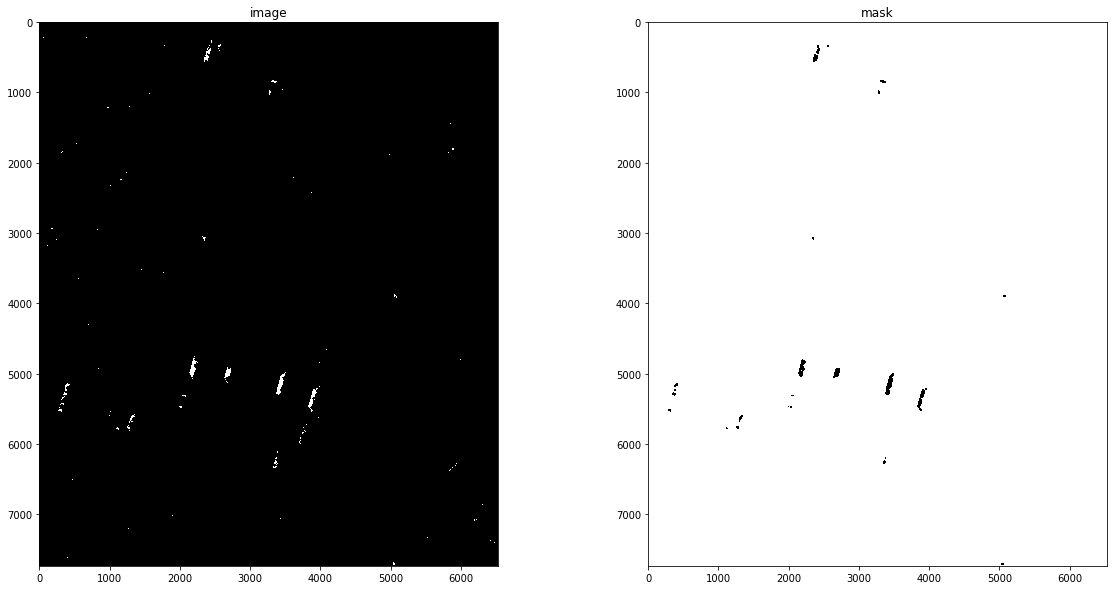

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(mask, cmap='gray')
ax1.set_title('image')
ax2.imshow(toy_pic, cmap='gray_r')
ax2.set_title('mask')

## 3. Connected components

In [90]:
type(toy_pic[0][0])

numpy.float32

In [91]:
ret, markers = cv2.connectedComponents(toy_pic.astype(np.int8))

In [ ]:
markers

In [92]:
markers.shape

(7737, 6529)

Text(0.5,1,'mask')

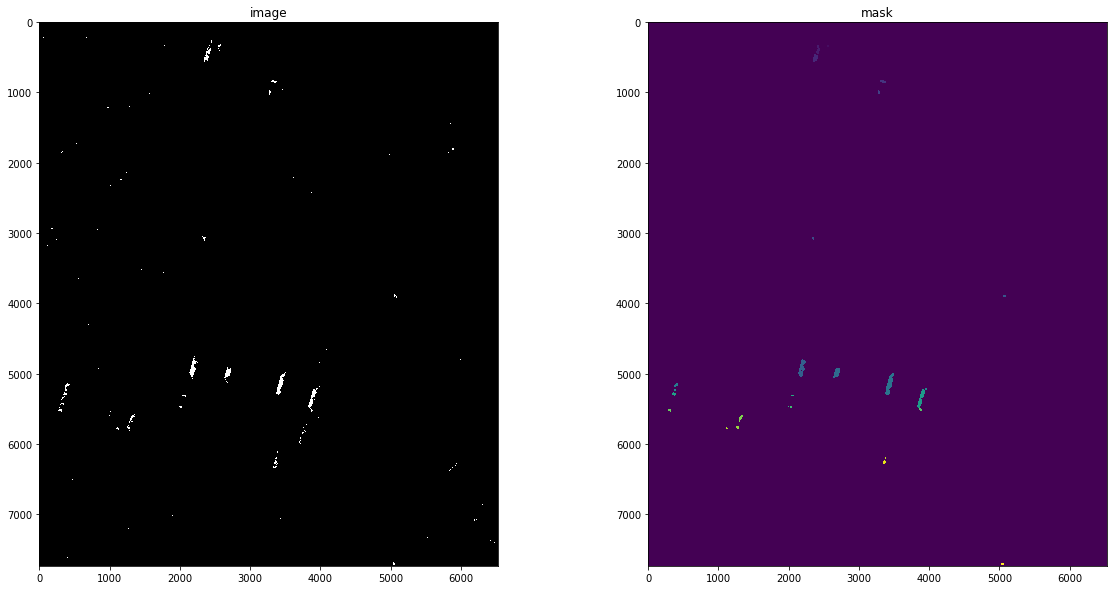

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(mask, cmap='gray')
ax1.set_title('image')
ax2.imshow(markers)
ax2.set_title('mask')

## 4. Watershed

In [96]:
type(mask[0][0]), type(markers[0][0])

(numpy.int64, numpy.int32)

In [100]:
mask.shape

(7737, 6529)

In [103]:
water_markers = cv2.watershed(mask.reshape((7737, 6529, 1)), markers.reshape((7737, 6529, 1)))

error: OpenCV(3.4.1) /root/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((3)-1) << 3)) && dst.type() == (((4) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function watershed


In [ ]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

In [125]:
np.unique(markers)[1:]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int32)

In [106]:
markers[markers == 0].shape

(50421612,)

## 5. make submission

In [128]:
def rle_encode(img, min_max_threshold=1e-3, max_mean_threshold=None):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    if np.max(img) < min_max_threshold:
        return '' ## no need to encode if it's all zeros
    if max_mean_threshold and np.mean(img) > max_mean_threshold:
        return '' ## ignore overfilled mask
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [ ]:
vselect = np.vectorize(lambda x: 0 if x < 255 else 1)

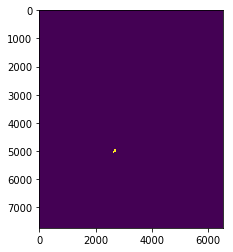

In [127]:
plt.imshow(np.where(markers == 9, 255, 0))
plt.show()

In [134]:
submission = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])

In [135]:
submission.head()

Empty DataFrame
Columns: [ImageId, EncodedPixels]
Index: []

In [163]:
IMAGE_ID = '2YNGEOYOEH0YXBJV.png'

In [136]:
rle_encode(np.where(markers == 1, 255, 0))

'19690997 21 19698733 22 19706470 22 19714206 23 19721943 23 19729679 24 19737415 25 19745152 25 19752888 26 19760625 26 19768361 27 19776097 28 19783834 28 19791570 29 19799307 29 19807044 29 19814781 29 19822518 29 19830255 29 19837992 29 19845729 29 19853466 29 19861203 29 19868940 29 19876677 29 19884414 29 19892151 29 19899888 29 19907625 29 19915362 29 19923099 26 19930836 26 19938573 26 19946310 26'

In [164]:
submission = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])
for i in np.unique(markers)[1:]:
    submission.loc[i] = [IMAGE_ID, rle_encode(np.where(markers == i, 255, 0))]
submission

ImageId                                      EncodedPixels
1   2YNGEOYOEH0YXBJV.png  19690997 21 19698733 22 19706470 22 19714206 2...
2   2YNGEOYOEH0YXBJV.png  18460890 21 18468627 21 18476364 21 18484101 2...
3   2YNGEOYOEH0YXBJV.png  18128332 22 18136069 22 18143806 23 18151543 2...
4   2YNGEOYOEH0YXBJV.png  25579357 22 25587092 24 25594825 28 25602559 3...
5   2YNGEOYOEH0YXBJV.png  25270026 23 25277762 25 25285498 26 25293226 3...
6   2YNGEOYOEH0YXBJV.png  18068957 22 18076694 24 18084431 25 18092168 2...
7   2YNGEOYOEH0YXBJV.png  39075736 26 39083470 29 39091204 33 39098939 3...
8   2YNGEOYOEH0YXBJV.png  16546683 23 16554417 28 16562152 32 16569886 3...
9   2YNGEOYOEH0YXBJV.png  20415245 22 20422980 24 20430716 25 20438441 3...
10  2YNGEOYOEH0YXBJV.png  26094422 22 26102159 23 26109896 25 26117633 2...
11  2YNGEOYOEH0YXBJV.png  2875594 22 2883331 22 2891068 22 2898805 22 29...
12  2YNGEOYOEH0YXBJV.png  30496726 23 30504462 27 30512199 29 30519935 3...
13  2YNGEOYOEH0YXBJV.png  2821485 21 2829222 22 2836959 23 2844696 35 28...
14  2YNGEOYOEH0YXBJV.png  29645898 25 29653632 30 29661366 35 29669101 3...
15  2YNGEOYOEH0YXBJV.png  2659080 22 2666816 23 2674549 27 2682285 28 26...
16  2YNGEOYOEH0YXBJV.png  15781043 21 15788780 21 15796517 21 15804254 2...
17  2YNGEOYOEH0YXBJV.png  15402089 21 15409826 22 15417563 22 15425300 2...
18  2YNGEOYOEH0YXBJV.png  15641946 21 15649683 21 15657420 21 15665157 2...
19  2YNGEOYOEH0YXBJV.png  29878054 22 29885791 25 29893528 26 29901265 2...
20  2YNGEOYOEH0YXBJV.png  2210552 27 2218289 27 2226026 27 2233762 28 22...
21  2YNGEOYOEH0YXBJV.png  9970918 21 9978654 22 9986390 23 9994124 26 10...
22  2YNGEOYOEH0YXBJV.png  9700210 21 9707947 22 9715684 23 9723421 24 97...
23  2YNGEOYOEH0YXBJV.png  8539680 23 8547413 27 8555149 29 8562885 30 85...
24  2YNGEOYOEH0YXBJV.png  26041195 22 26048932 22 26056669 22 26064406 2...
25  2YNGEOYOEH0YXBJV.png  25894258 35 25901992 38 25909724 43 25917458 4...
26  2YNGEOYOEH0YXBJV.png  38909335 21 38917071 22 38924807 23 38932542 2...

In [165]:
submission.to_csv('submit.csv', index=False)

In [161]:
toy_submit = pd.read_csv('submit.csv')

In [162]:
toy_submit.head()

ImageId                                      EncodedPixels
0  2YNGEOYOEH0YXBJV  19690997 21 19698733 22 19706470 22 19714206 2...
1  2YNGEOYOEH0YXBJV  18460890 21 18468627 21 18476364 21 18484101 2...
2  2YNGEOYOEH0YXBJV  18128332 22 18136069 22 18143806 23 18151543 2...
3  2YNGEOYOEH0YXBJV  25579357 22 25587092 24 25594825 28 25602559 3...
4  2YNGEOYOEH0YXBJV  25270026 23 25277762 25 25285498 26 25293226 3...

## 6. Boxes TXT

In [206]:
HEIGHT = test_pic.shape[0]
WIDTH = test_pic.shape[1]

In [205]:
test_pic.shape

(7737, 6529, 3)

In [166]:
! ls

aero_delays  dataset  simple_submit.ipynb  test_gpu.ipynb
boxes	     gishack  submit.csv	   unet-test.ipynb


In [167]:
boxes_paths = ['boxes/KHSF2T5PXCKI0978_boxes.txt',
    'boxes/P2MLF2MV9K9XIYUI_boxes.txt',
    'boxes/ZRYNEEUSVQ213QTY_boxes.txt']

In [233]:
with open(boxes_paths[0], 'r') as f:
    boxes_0 = f.read()
    f.closed

In [197]:
def convert_text_to_coords(string):
    boxes = string.split('\n')
    coords = np.zeros((len(boxes), 4),dtype='int')
    for i, box in enumerate(boxes):
        corners = box.split(' ')
#         int(corners[0])
        if len(corners) < 2: break
#         print(corners)
        
        coords[i] = [int(corners[0]), int(corners[1]), int(corners[2]), int(corners[3])]
    return coords

In [234]:
convert_text_to_coords(boxes_0).shape

(301, 4)

In [235]:
toy_coords = convert_text_to_coords(boxes_0)

In [256]:
with open(boxes_paths[1], 'r') as f:
    boxes_1 = f.read()
    f.closed

In [257]:
with open(boxes_paths[2], 'r') as f:
    boxes_2 = f.read()
    f.closed

In [259]:
toy_coords1 = convert_text_to_coords(boxes_1)

In [260]:
toy_coords2 = convert_text_to_coords(boxes_2)

In [236]:
type(toy_coords[0][0])

numpy.int64

In [237]:
for box in toy_coords:
    print(box)

[3633 1086 3832 1248]
[4240  304 4446  539]
[5186 5109 5350 5451]
[3233 3237 3428 3421]
[4231 1768 4391 2022]
[1846  314 2012  520]
[2607 1729 2866 1965]
[2984 1796 3209 1957]
[5568 6466 6129 7045]
[4208 2326 4368 2508]
[3273 5734 3426 6112]
[6117 5131 6278 5497]
[2507 2302 2695 2502]
[2806 3126 3072 3370]
[4814 1105 5015 1250]
[2769 6751 2919 7027]
[ 659 2770  865 2945]
[5548 5113 5921 5288]
[4666 4581 4800 4836]
[4275 4471 4464 4638]
[3441    0 3615  139]
[3916  644 4047  823]
[5042 3373 5216 3518]
[3288 5366 3439 5567]
[4499 3323 4691 3450]
[4874 4696 5032 4846]
[5320 2563 5518 2711]
[5300  369 5442  563]
[3633  662 3824  796]
[6407 3420 6530 3575]
[5645  381 5829  584]
[5266 4353 5447 4486]
[5908  430 6308  593]
[4706 2553 4859 2687]
[6251 1498 6415 1666]
[2586 1952 2812 2162]
[5404 2838 5558 3055]
[2307  621 2472  785]
[4854   19 5017  152]
[4806 3602 4991 3764]
[5488 5619 5672 6330]
[5842 4668 6044 4895]
[3072 1515 3224 1661]
[3247 3743 3736 3954]
[4071 7037 4736 7253]
[4244 5107

In [231]:
def get_rle_for_box(box):
    x0, y0, x1, y1 = box
    mask = np.zeros((HEIGHT, WIDTH))
    mask[x0:x1,y0:y1] = 1
    return rle_encode(mask)

In [238]:
get_rle_for_box(toy_coords[0])

'8406016 199 8413753 199 8421490 199 8429227 199 8436964 199 8444701 199 8452438 199 8460175 199 8467912 199 8475649 199 8483386 199 8491123 199 8498860 199 8506597 199 8514334 199 8522071 199 8529808 199 8537545 199 8545282 199 8553019 199 8560756 199 8568493 199 8576230 199 8583967 199 8591704 199 8599441 199 8607178 199 8614915 199 8622652 199 8630389 199 8638126 199 8645863 199 8653600 199 8661337 199 8669074 199 8676811 199 8684548 199 8692285 199 8700022 199 8707759 199 8715496 199 8723233 199 8730970 199 8738707 199 8746444 199 8754181 199 8761918 199 8769655 199 8777392 199 8785129 199 8792866 199 8800603 199 8808340 199 8816077 199 8823814 199 8831551 199 8839288 199 8847025 199 8854762 199 8862499 199 8870236 199 8877973 199 8885710 199 8893447 199 8901184 199 8908921 199 8916658 199 8924395 199 8932132 199 8939869 199 8947606 199 8955343 199 8963080 199 8970817 199 8978554 199 8986291 199 8994028 199 9001765 199 9009502 199 9017239 199 9024976 199 9032713 199 9040450 199 904

In [249]:
submission = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])

## Final Submit

In [246]:
with open(boxes_paths[0], 'r') as f:
    boxes_0 = f.read()
    f.closed

In [269]:
IMAGE_ID = 'KHSF2T5PXCKI0978.png'
HEIGHT = 7734
WIDTH = 6528

In [270]:
def get_rle_for_box(box):
    x0, y0, x1, y1 = box
    mask = np.zeros((HEIGHT, WIDTH))
    mask[x0:x1,y0:y1] = 1
    return rle_encode(mask)

In [271]:
for i, box in enumerate(toy_coords):
    print(i)
    submission.loc[i] = [IMAGE_ID, get_rle_for_box(box)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [261]:
IMAGE_ID = 'P2MLF2MV9K9XIYUI.png'
HEIGHT = 7735
WIDTH = 6529

In [262]:
def get_rle_for_box(box):
    x0, y0, x1, y1 = box
    mask = np.zeros((HEIGHT, WIDTH))
    mask[x0:x1,y0:y1] = 1
    return rle_encode(mask)

In [263]:
submission1 = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])

In [264]:
for i, box in enumerate(toy_coords1):
    print(i)
    submission1.loc[i] = [IMAGE_ID, get_rle_for_box(box)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [265]:
IMAGE_ID = 'ZRYNEEUSVQ213QTY.png'
HEIGHT = 7736
WIDTH = 6530

In [266]:
def get_rle_for_box(box):
    x0, y0, x1, y1 = box
    mask = np.zeros((HEIGHT, WIDTH))
    mask[x0:x1,y0:y1] = 1
    return rle_encode(mask)

In [267]:
submission2 = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])

In [268]:
for i, box in enumerate(toy_coords2):
    print(i)
    submission2.loc[i] = [IMAGE_ID, get_rle_for_box(box)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### Concat Sub + Sub1 + Sub2

In [272]:
super_submit = submission.append(submission1)

In [273]:
super_submit = super_submit.append(submission2)

In [283]:
super_submit.to_csv('final_submit-2.csv', index=False)

In [282]:
super_submit = super_submit[super_submit['EncodedPixels'] != '']